<a href="https://colab.research.google.com/github/paulopetrillo/FIAP_TECH_CHALENGE_01/blob/main/TECH_CHALENGE_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install yfinance

In [ ]:
# !pip install pandas

In [ ]:
# Carrega/importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import matplotlib

import warnings
warnings.filterwarnings('ignore')


# carrega bilbioteca yfinance (sugerida pelo Prof. Daniel Lima) para carregar
# automaticamente os dados da BVSP (https://br.investing.com/indices/bovespa-historical-data)
import yfinance as yf

print('Versão do pandas => %s' % pd.__version__)
print('Versão do numpy => %s' % np.__version__)
print('Versão do matplotlib => %s' % matplotlib.__version__)
print('Versão do seaborn => %s' % sns.__version__ )
print('Versão do yfinance => %s' % yf.__version__ )



# "^BVSP" parametro para pegar a cotação da BVSP (Ibovespa (IBOV))
dados = yf.Ticker("^BVSP")

Versão do pandas => 2.2.2
Versão do numpy => 2.0.2
Versão do matplotlib => 3.10.0
Versão do seaborn => 0.13.2
Versão do yfinance => 0.2.65


In [ ]:
# paranmetros completos para dowload dos dados da BVSP.
# Conforme: https://ranaroussi.github.io/yfinance/
dados = yf.Ticker("^BVSP")
dados.info
dados.calendar
dados.analyst_price_targets
dados.quarterly_income_stmt
# dados.history(start='2022-01-01', end='2025-07-19')
# dat.history(period='3y')
# dat.option_chain(dat.options[4]).calls

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 


""


In [ ]:
# documentação em: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# https://github.com/ranaroussi/yfinance
# ----------------------------------------------------------------------------------
# periodstr
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Default: 1mo Either Use period parameter or use start and end

# intervalstr
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days

# start: str
# Download start date string (YYYY-MM-DD) or _datetime, inclusive. Default is 99 years ago E.g. for start=”2020-01-01”, the first data point will be on “2020-01-01”

# end: str
# Download end date string (YYYY-MM-DD) or _datetime, exclusive. Default is now E.g. for end=”2023-01-01”, the last data point will be on “2022-12-31”

In [ ]:
# Atribuinda os dados a variável dados.
#dados = dat.history(period="max")
#dados = dados.history(start='2022-01-01', end='2025-07-19')
dados = dados.history(period='5y')


# transforma dados em um Dataframe.
dados = pd.DataFrame(dados)

# verificando os tipos de cada coluna.
dados.info()

# Observação:
# A coluna "close" dos dados baixados refere-se a coluna "Último"
# dos dados do site "https://br.investing.com/indices/bovespa-historical-data".

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-08-12 00:00:00-03:00 to 2025-08-12 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1244 non-null   float64
 1   High          1244 non-null   float64
 2   Low           1244 non-null   float64
 3   Close         1244 non-null   float64
 4   Volume        1244 non-null   int64  
 5   Dividends     1244 non-null   float64
 6   Stock Splits  1244 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.8 KB


In [ ]:
# Verifica alguns valores do dataframe.
dados.tail(15)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-23 00:00:00-03:00,134036.00000,135782.00,133676.00000,135368.0000,6527600,0.0,0.0
2025-07-24 00:00:00-03:00,135357.00000,135363.00,133648.00000,133808.0000,5976800,0.0,0.0
2025-07-25 00:00:00-03:00,133820.00000,134204.00,133285.00000,133524.0000,5560900,0.0,0.0
2025-07-28 00:00:00-03:00,133538.00000,133902.00,131550.00000,132129.0000,6625600,0.0,0.0
2025-07-29 00:00:00-03:00,132130.00000,133346.00,132130.00000,132726.0000,6324800,0.0,0.0
2025-07-30 00:00:00-03:00,132702.00000,134368.00,131883.00000,133990.0000,8655300,0.0,0.0
2025-07-31 00:00:00-03:00,133987.00000,133987.00,132096.00000,133071.0000,9196800,0.0,0.0
2025-08-01 00:00:00-03:00,132920.00000,133237.00,132140.00000,132437.0000,8497100,0.0,0.0
2025-08-04 00:00:00-03:00,132440.00000,133929.00,132440.00000,132971.0000,6136600,0.0,0.0


In [ ]:
# # selecionar os dados de janeiro de 2023 do dataframe dados
# dados.loc[dados.index > '2023-01-02']

In [ ]:
# Descrição inicial dos campos
dados.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03,1244.0,1244.0
mean,117927.581265,118860.825764,117026.097342,117954.273061,1.077257e+07,0.0,0.0
std,10836.977063,10725.738526,10937.979729,10843.349408,3.234412e+06,0.0,0.0
min,93586.000000,95340.000000,93387.000000,93580.000000,0.000000e+00,0.0,0.0
25%,109886.500000,110734.250000,108550.500000,109872.750000,8.778875e+06,0.0,0.0
50%,118060.000000,118962.000000,117163.500000,118074.000000,1.051645e+07,0.0,0.0
75%,127129.250000,127826.500000,126234.250000,127141.500000,1.257128e+07,0.0,0.0
max,141265.000000,141537.000000,140597.000000,141478.000000,2.602930e+07,0.0,0.0


In [ ]:
# # Transpõe a tabela de resumo de dados estatísticos (describe).
# dados.describe().T

In [ ]:
# Observação 1:
# Campos "Dividends" e "Stock Splits" não tem dados, portanto podem ser retirados.

# Retirando as colunas  "Dividends" e "Stock Splits"
dados = dados.drop(labels=['Dividends', 'Stock Splits'], axis=1)
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-12 00:00:00-03:00,102176.0,103116.0,100698.0,102118.0,10114200
2020-08-13 00:00:00-03:00,102118.0,103237.0,100187.0,100461.0,10721300
2020-08-14 00:00:00-03:00,100469.0,101717.0,100445.0,101353.0,8576300
2020-08-17 00:00:00-03:00,101348.0,101689.0,98513.0,99595.0,10816200
2020-08-18 00:00:00-03:00,99597.0,102247.0,99597.0,102065.0,9418700


In [ ]:
# Obsevação 2:
# A coluna "Date" está como índice da tabela.

# Mostra os dados
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-12 00:00:00-03:00,102176.0,103116.0,100698.0,102118.0,10114200
2020-08-13 00:00:00-03:00,102118.0,103237.0,100187.0,100461.0,10721300
2020-08-14 00:00:00-03:00,100469.0,101717.0,100445.0,101353.0,8576300
2020-08-17 00:00:00-03:00,101348.0,101689.0,98513.0,99595.0,10816200
2020-08-18 00:00:00-03:00,99597.0,102247.0,99597.0,102065.0,9418700


In [ ]:
from sqlite3 import Timestamp
from os import times_result
# Vamos criar uma coluna com os dados do indice do tipo data.

# Importa biblioteca para tratar datas
from datetime import datetime

# Cria coluna com as datas.
dados['Data'] = dados.index

# Formata para dia.mês.ano (o método "".dt.date" deixa o campo com tipo object).
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y').dt.date

# Define o indice do Data-Frame com a Data (facilita na busca por datas).
dados.index = pd.to_datetime(dados.Data, format='%d-%m-%Y')
# dados.index = pd.to_datetime(dados.index, format='%d-%m-%Y') ##<<< bastaria nesta celula

# Transforma o tipo da coluna "Data" de 'Object' para 'datetime64'.
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y')

# Informações dos dados (quantidade e tipo de dados).
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-08-12 to 2025-08-12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    1244 non-null   float64       
 1   High    1244 non-null   float64       
 2   Low     1244 non-null   float64       
 3   Close   1244 non-null   float64       
 4   Volume  1244 non-null   int64         
 5   Data    1244 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.0 KB


,Open,High,Low,Close,Volume,Data
Data,,,,,,
2020-08-12,102176.0,103116.0,100698.0,102118.0,10114200,2020-08-12
2020-08-13,102118.0,103237.0,100187.0,100461.0,10721300,2020-08-13
2020-08-14,100469.0,101717.0,100445.0,101353.0,8576300,2020-08-14
2020-08-17,101348.0,101689.0,98513.0,99595.0,10816200,2020-08-17
2020-08-18,99597.0,102247.0,99597.0,102065.0,9418700,2020-08-18


In [ ]:
# Testa busca de linhas do dataframe usando a data como indíce.
dados.loc['01-05-2024']

,2024-01-05
Open,131218.0
High,132635.0
Low,130579.0
Close,132023.0
Volume,9199700
Data,2024-01-05 00:00:00


In [ ]:
# Alterando a ordem das colunas, apenas para ficar na mesma sequência que o site.
dados = dados[['Close', 'Open', 'High', 'Low', 'Volume', 'Data']]
dados.head()

,Close,Open,High,Low,Volume,Data
Data,,,,,,
2020-08-12,102118.0,102176.0,103116.0,100698.0,10114200,2020-08-12
2020-08-13,100461.0,102118.0,103237.0,100187.0,10721300,2020-08-13
2020-08-14,101353.0,100469.0,101717.0,100445.0,8576300,2020-08-14
2020-08-17,99595.0,101348.0,101689.0,98513.0,10816200,2020-08-17
2020-08-18,102065.0,99597.0,102247.0,99597.0,9418700,2020-08-18


In [ ]:
# # Executar está célula caso queira apagar (dropar) a coluna "Data".
# dados.drop(labels=['Data'], axis=1, inplace=True)
# dados.head()

In [ ]:
# Renomei as colunas conforme dados da BVSP.
dados.rename(columns={'Close':'Ultimo',
                      'Open':'Abertura',
                      'High':'Maxima',
                      'Low':'Minima'},inplace=True)
dados.info()
dados.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-08-12 to 2025-08-12
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ultimo    1244 non-null   float64       
 1   Abertura  1244 non-null   float64       
 2   Maxima    1244 non-null   float64       
 3   Minima    1244 non-null   float64       
 4   Volume    1244 non-null   int64         
 5   Data      1244 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 100.3 KB


,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2025-08-06,134538.0000,133169.00000,135241.00,133169.00000,8681700,2025-08-06
2025-08-07,136528.0000,134538.00000,137007.00,134534.00000,9501000,2025-08-07
2025-08-08,135913.0000,136526.00000,136761.00,135659.00000,9890600,2025-08-08
2025-08-11,135623.0000,135913.00000,136307.00,135496.00000,6947300,2025-08-11
2025-08-12,137913.6875,135629.09375,138414.25,135629.09375,0,2025-08-12


In [ ]:
type(dados.index)

pandas.core.indexes.datetimes.DatetimeIndex

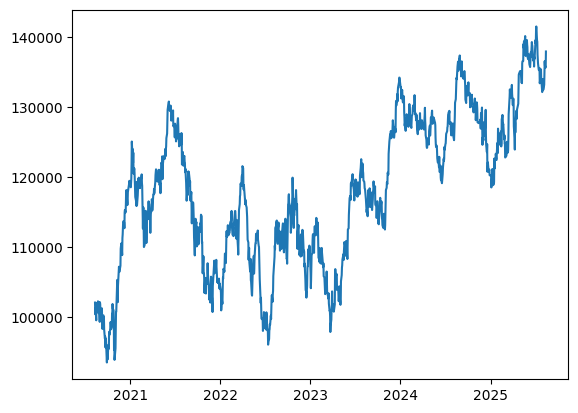

In [ ]:
# Plotando os resultados do Valor de fechamento da bolsa (campo chamado "Último").
plt.plot(dados.index, dados['Ultimo'])
#plt.plot(dados.Data, dados['Último'])

In [ ]:
resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=252)

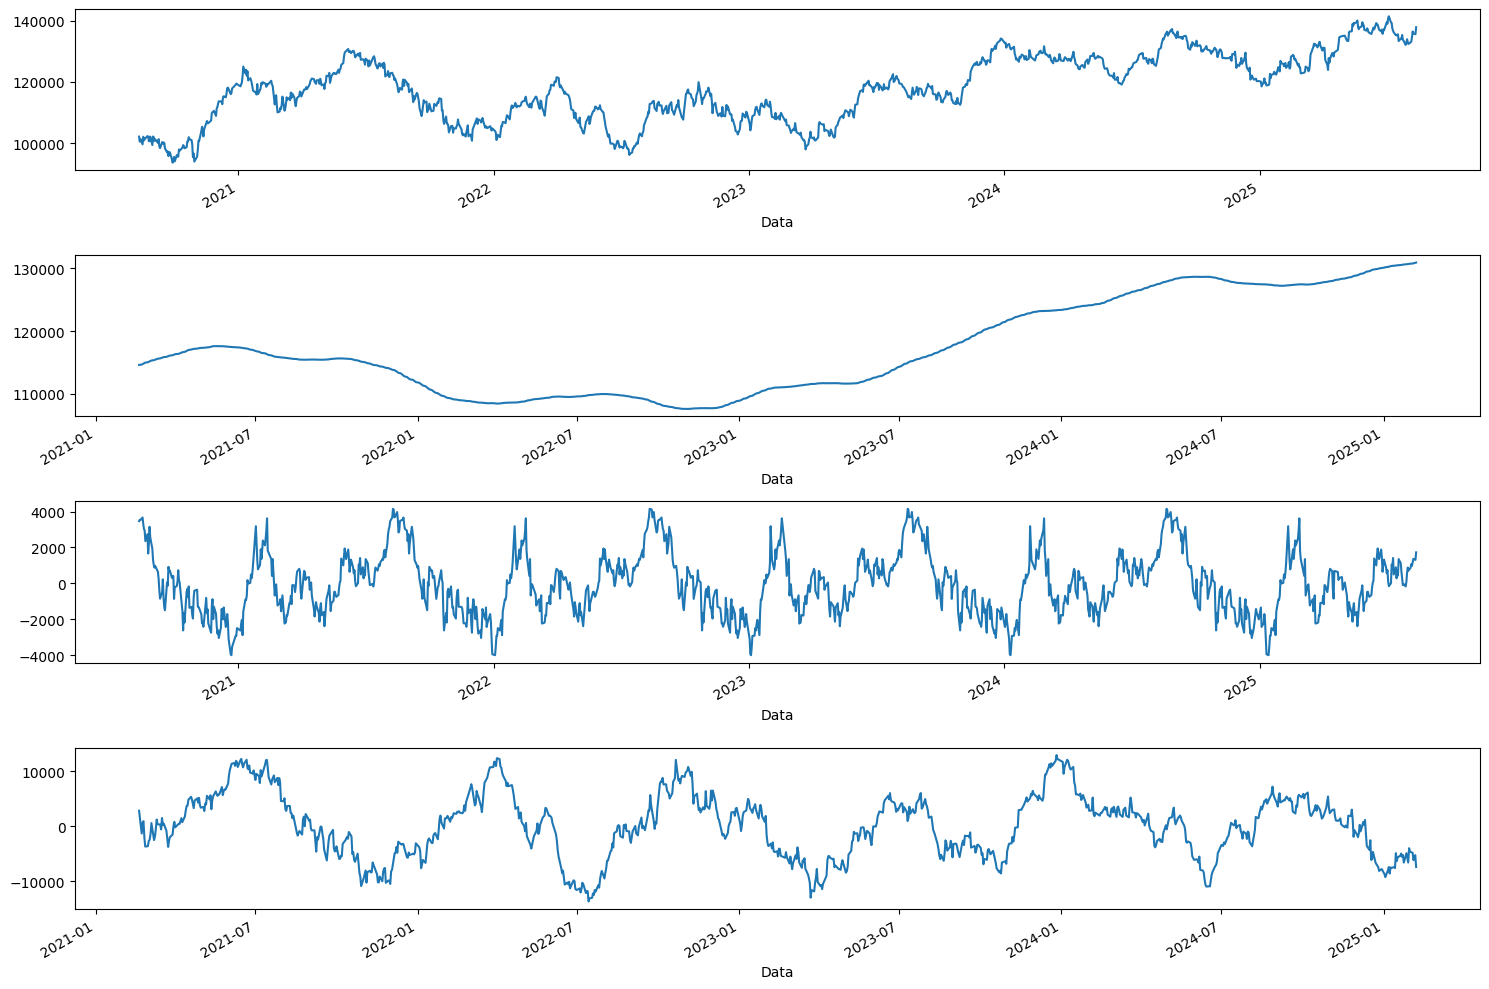

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [ ]:
# tendência - direção (seta para cima, seta para baixo)
# sazonalidade - recorrência das oscilações
# resíduos - o que sobra do sinal - erros - desvio da média

In [ ]:
# Veridficação quanto a série ser "estacionário" ou "não estacionário".

# ADF (Augmented Dickey-Fuller)
# H0 - Hipótese nula <=> Série NÃO é estacionário.
# H1 - Hipótese altrenativa <=> Sério é estacionário.

# p-value =< 0.05 (5%), então rejeitamos H0 com nível de confiança de 95%.
# SE (p-value menor ou igual À 5%) ENTÃO (rejeita H0)

# Mais genericamente:
# SE (teste aplicado =< p-value), ENTÃO (rejeitamos H0), ou ainda
# SE (teste aplicado menor ou igual à p-value), ENTÃO (rejeitamos H0).

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
sns.set_style('darkgrid')

In [ ]:
x = dados['Ultimo'].values

In [ ]:
result =  adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

for key, value in result[4].items():
  print(f'{key}: {value}')

ADF Statistic: -2.0169135528227633
p-value: 0.2792066877410898
Critical Values: {'1%': np.float64(-3.435621806786881), '5%': np.float64(-2.8638680226791444), '10%': np.float64(-2.5680094689100477)}
1%: -3.435621806786881
5%: -2.8638680226791444
10%: -2.5680094689100477


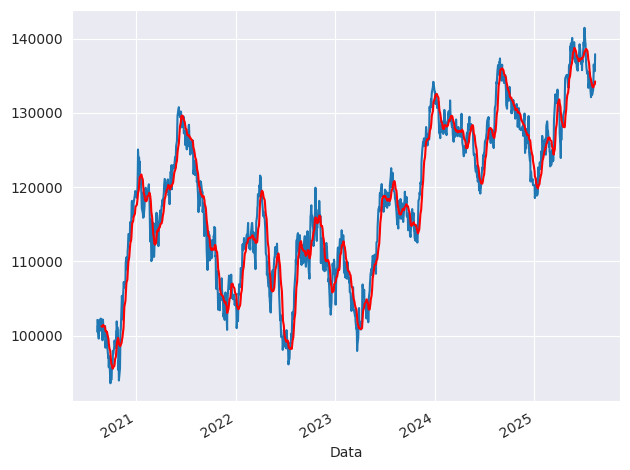

In [ ]:
ma = dados.Ultimo.rolling(12).mean()

f, ax = plt.subplots()
#dados.select_dtypes(include=np.number).plot(ax=ax, legend=False)
dados.Ultimo.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r') # ma <=> moving average (curva masi suaves - menor influencia de variação)
plt.tight_layout()

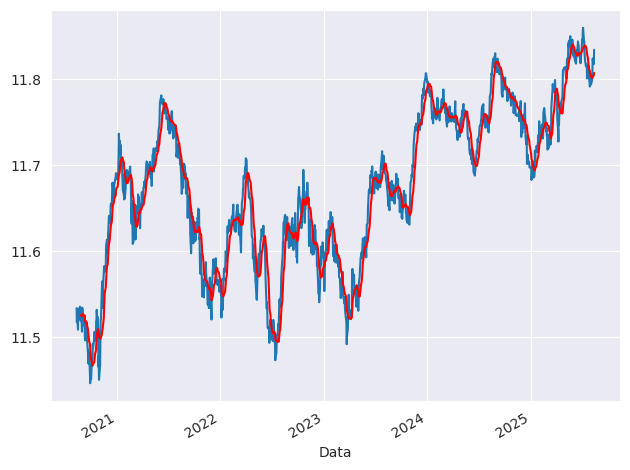

In [ ]:
dados_Ultimo_log = np.log(dados.Ultimo)
ma_log = dados_Ultimo_log.rolling(12).mean()

f, ax = plt.subplots()
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

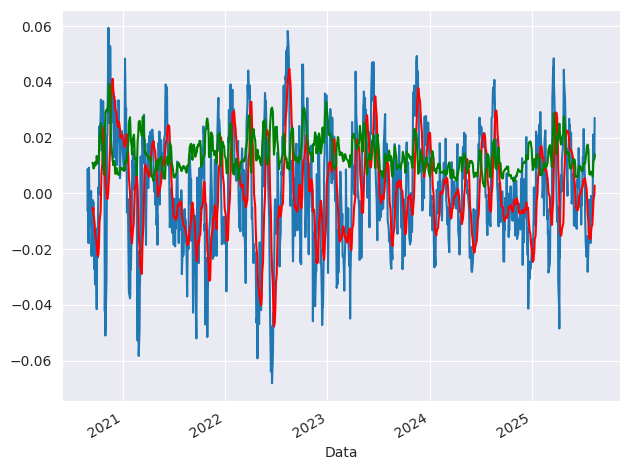

In [ ]:
dados_Ultimo_s = (dados_Ultimo_log - ma_log).dropna()

# media (ma_s)
ma_s = dados_Ultimo_s.rolling(12).mean()

# desvio padrão (std)
std = dados_Ultimo_s.rolling(12).std()

f, ax = plt.subplots()
dados_Ultimo_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r') # media => linha vermelha
std.plot(ax=ax, legend=False, color='g')  # desvio padrão => linha verde
plt.tight_layout()


In [ ]:
X_s = dados_Ultimo_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -9.831176505212124
P-Value: 5.032546923329126e-17
Valores críticos:
	1%: -3.4356863371792095
	5%: -2.8638964938393667
	10%: -2.568024631481501


Teste ADF
Teste Estatístico: -36.67510222397079
P-Value: 0.0
Valores críticos:
	1%: -3.4356260602190356
	5%: -2.863869899335344
	10%: -2.5680104683371323


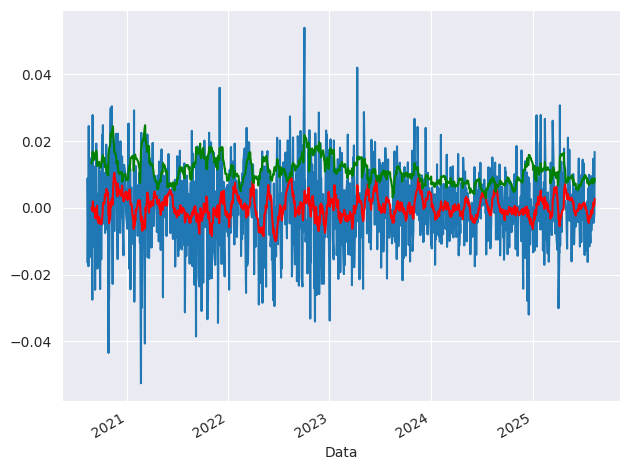

In [ ]:
dados_Ultimo_diff = dados_Ultimo_log.diff(1)
ma_diff = dados_Ultimo_diff.rolling(12).mean()

std_diff = dados_Ultimo_diff.rolling(12).std()


f, ax = plt.subplots()
dados_Ultimo_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = dados_Ultimo_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -13.973457026160741
P-Value: 4.303616815830716e-26
Valores críticos:
	1%: -3.435712593855191
	5%: -2.863908078253003
	10%: -2.5680308008925294


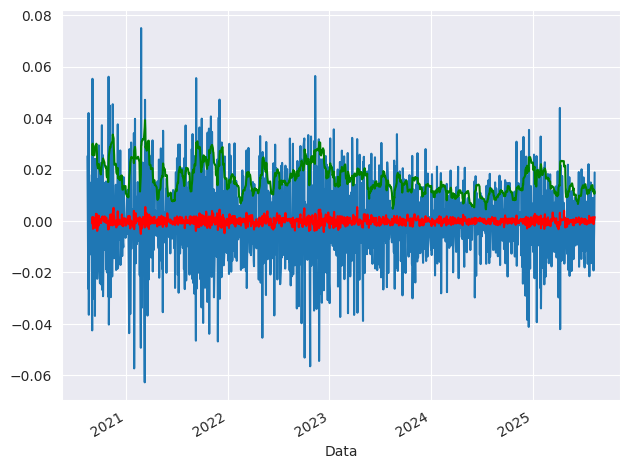

In [ ]:
dados_Ultimo_diff_2 = dados_Ultimo_diff.diff(1)
ma_diff_2 = dados_Ultimo_diff_2.rolling(12).mean()

std_diff_2 = dados_Ultimo_diff_2.rolling(12).std()


f, ax = plt.subplots()
dados_Ultimo_diff_2.plot(ax=ax, legend=False)
ma_diff_2.plot(ax=ax, legend=False, color='r')
std_diff_2.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff_2 = dados_Ultimo_diff_2.dropna().values
result_diff_2 = adfuller(X_diff_2)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff_2[0]}")
print(f"P-Value: {result_diff_2[1]}")
print("Valores críticos:")

for key, value in result_diff_2[4].items():
  print(f"\t{key}: {value}")

# dados_Ultimo_diff = dados_Ultimo_s.diff(1)
# ma_diff = dados_Ultimo_diff.rolling(12).mean()

# std_diff = dados_Ultimo_diff.rolling(12).std()


# f, ax = plt.subplots()
# dados_Ultimo_diff.plot(ax=ax, legend=False)
# ma_diff.plot(ax=ax, legend=False, color='r')
# std_diff.plot(ax=ax, legend=False, color='g')
# plt.tight_layout()

# X_diff = dados_Ultimo_diff.dropna().values
# result_diff = adfuller(X_diff)

# print("Teste ADF")
# print(f"Teste Estatístico: {result_diff[0]}")
# print(f"P-Value: {result_diff[1]}")
# print("Valores críticos:")

# for key, value in result_diff[4].items():
#   print(f"\t{key}: {value}")

In [ ]:
# ARIMA = AR-I-MA
# AR:Autoregressivo,
# I:Integrado,
# MA:Moving Avaerage

# ACF - AutoCorrelation Function
# PACF - Partial AutoCorrelation Function

lag_acf = acf(dados_Ultimo_s, nlags=12)
lag_pacf = pacf(dados_Ultimo_s, nlags=12, method='ywadjusted')

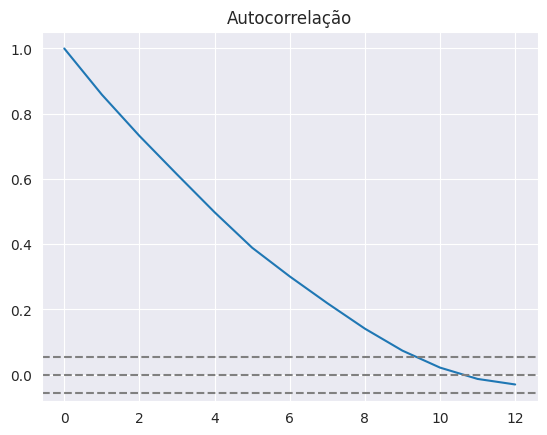

In [ ]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray')

plt.title('Autocorrelação')
plt.show()

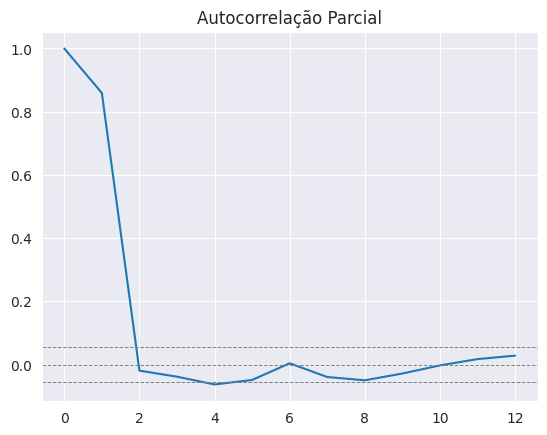

In [ ]:
plt.plot(lag_pacf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray',linewidth=0.7)

plt.title('Autocorrelação Parcial')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

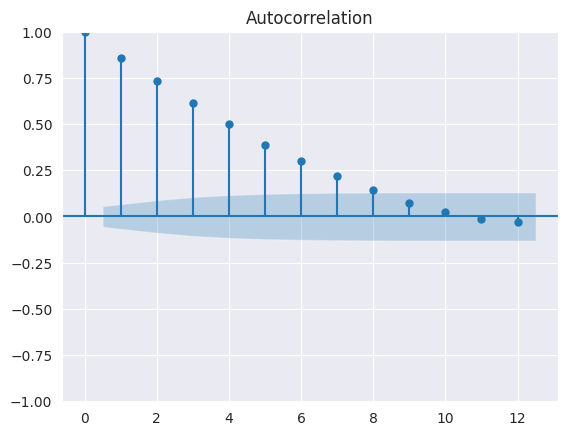

In [ ]:
plot_acf(dados_Ultimo_s, lags=12)
plt.show()

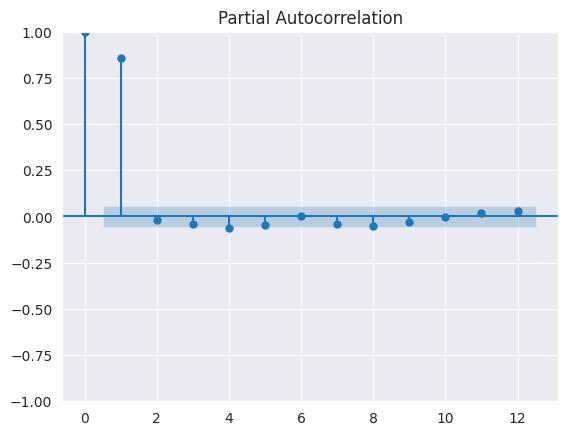

In [ ]:
plot_pacf(dados_Ultimo_s, lags=12)
plt.show()

In [ ]:
# instala a biblioteca statsforcast
!pip install statsforecast

In [ ]:
# copiando base de dados para utilização do statsforcast
df_statsforecast = dados.copy()
df_statsforecast.head()

,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2020-08-12,102118.0,102176.0,103116.0,100698.0,10114200,2020-08-12
2020-08-13,100461.0,102118.0,103237.0,100187.0,10721300,2020-08-13
2020-08-14,101353.0,100469.0,101717.0,100445.0,8576300,2020-08-14
2020-08-17,99595.0,101348.0,101689.0,98513.0,10816200,2020-08-17
2020-08-18,102065.0,99597.0,102247.0,99597.0,9418700,2020-08-18


In [ ]:
# Cria coluna de média móvel para 5 dias
df_statsforecast["MedMov5Dias"] = df_statsforecast["Ultimo"].rolling(window=5).mean()
# df_statsforecast["MedMov10Dias"] = df_statsforecast["Ultimo"].rolling(window=10).mean()
# df_statsforecast["MedMov30Dias"] = df_statsforecast["Ultimo"].rolling(window=30).mean

# Cria coluna categorica com as classes "Up" e "Down" que identifica a direção do movimento diário.
df_statsforecast['Daily_Direction'] = np.where(df_statsforecast['Ultimo'] > df_statsforecast['Abertura'], 'Up', 'Down')

# Formatando base de dados para o padrão de series temporais
df_statsforecast.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume','Data'], axis=1, inplace=True)
df_statsforecast.reset_index(inplace=True)
df_statsforecast.rename(columns={'Data':'ds'
                               , 'Daily_Direction':'unique_id'
                               , 'Ultimo':'y'}
                        , inplace=True)

# ver dados
df_statsforecast.head(10)

,ds,y,MedMov5Dias,unique_id
0,2020-08-12,102118.0,NaN,Down
1,2020-08-13,100461.0,NaN,Down
2,2020-08-14,101353.0,NaN,Up
3,2020-08-17,99595.0,NaN,Down
4,2020-08-18,102065.0,101118.4,Up
5,2020-08-19,100854.0,100865.6,Down
6,2020-08-20,101468.0,101067.0,Up
7,2020-08-21,101521.0,101100.6,Up
8,2020-08-24,102298.0,101641.2,Up
9,2020-08-25,102118.0,101651.8,Down


In [ ]:
# Separando os dados em grupo de treinamento e grupo de teste (validação).
treino = df_statsforecast.loc[df_statsforecast['ds'] < '2025-05-01']
teste = df_statsforecast.loc[(df_statsforecast['ds'] >= '2025-05-01') & (df_statsforecast['ds'] < '2025-07-19')]
h = teste['ds'].nunique()
h

55

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [ ]:
!pip install statsforecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: 1.84%


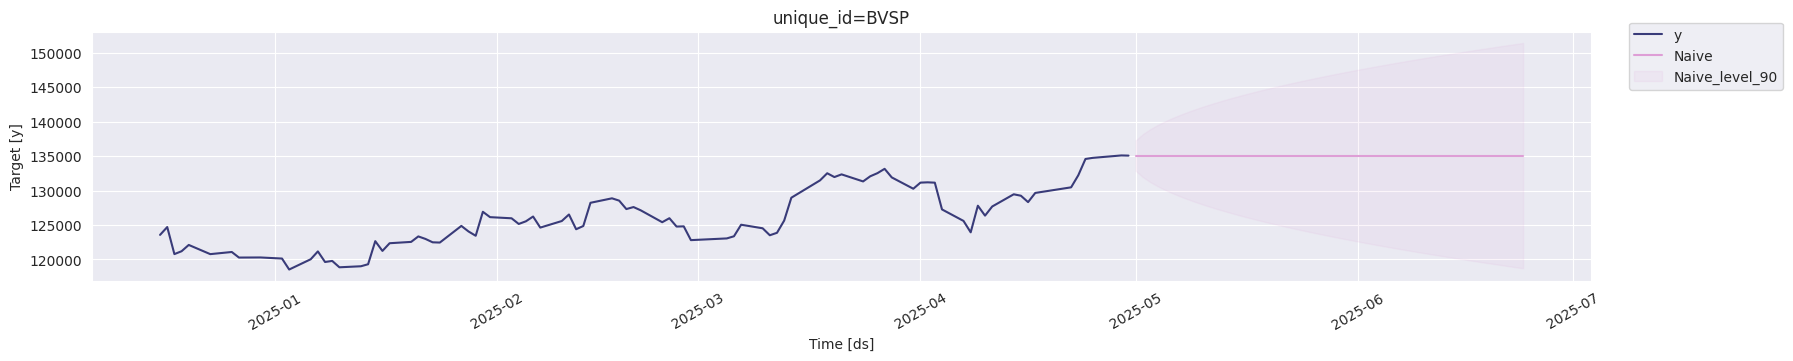

In [ ]:
treino['unique_id'] = 'BVSP'
# treino = treino.drop(columns=['Daily_Direction']) # Remove the string column - This column should be dropped before splitting into treino and teste
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])

wmape1 = wmape(teste['y'].values, forecast_df['Naive'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['BVSP'], engine ='matplotlib', max_insample_length=90) # Plot using the forecast_df directly
# model.plot(treino, forecast_df, level=[90], y=['y'],engine ='matplotlib', max_insample_length=90)

WMAPE: 2.66%


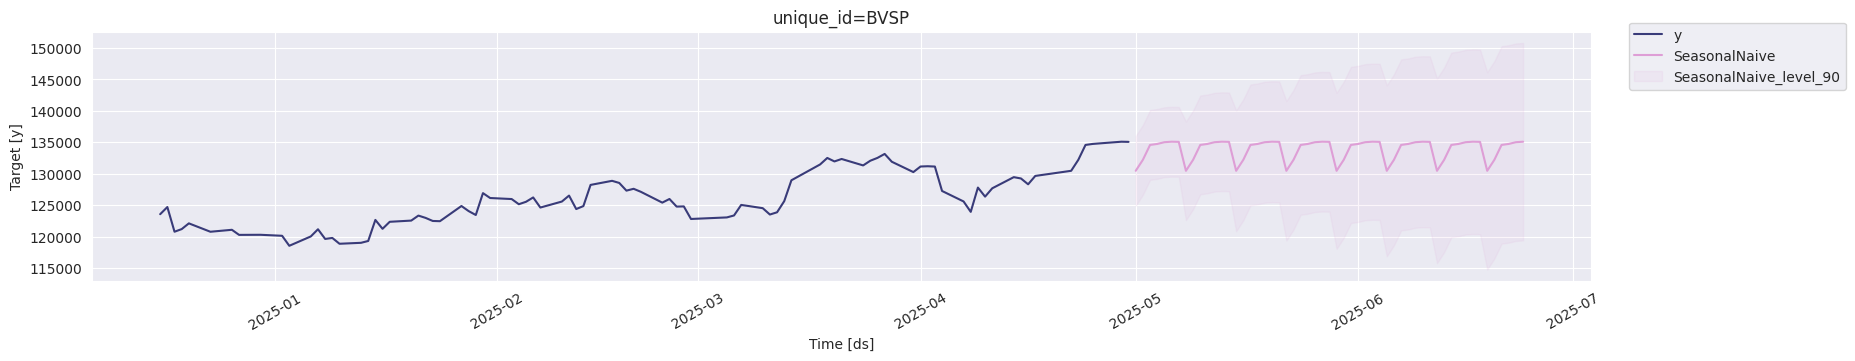

In [ ]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
# forecast_dfs = forecast_dfs.reset_index().merge(teste, on=['ds', 'unique_id'], how='left') # Moved merge after plotting

wmape2 = wmape(teste['y'].values, forecast_dfs['SeasonalNaive'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Plot using the forecast_dfs directly

,index,unique_id,ds,SeasWA,y,MedMov5Dias
0,0,BVSP,2025-05-01,129130.0,NaN,NaN
1,1,BVSP,2025-05-02,129285.5,NaN,NaN
2,2,BVSP,2025-05-03,131131.0,NaN,NaN
3,3,BVSP,2025-05-04,132096.5,NaN,NaN
4,4,BVSP,2025-05-05,132130.5,NaN,NaN


Index(['index', 'unique_id', 'ds', 'SeasWA', 'y', 'MedMov5Dias'], dtype='object')

WMAPE: nan%


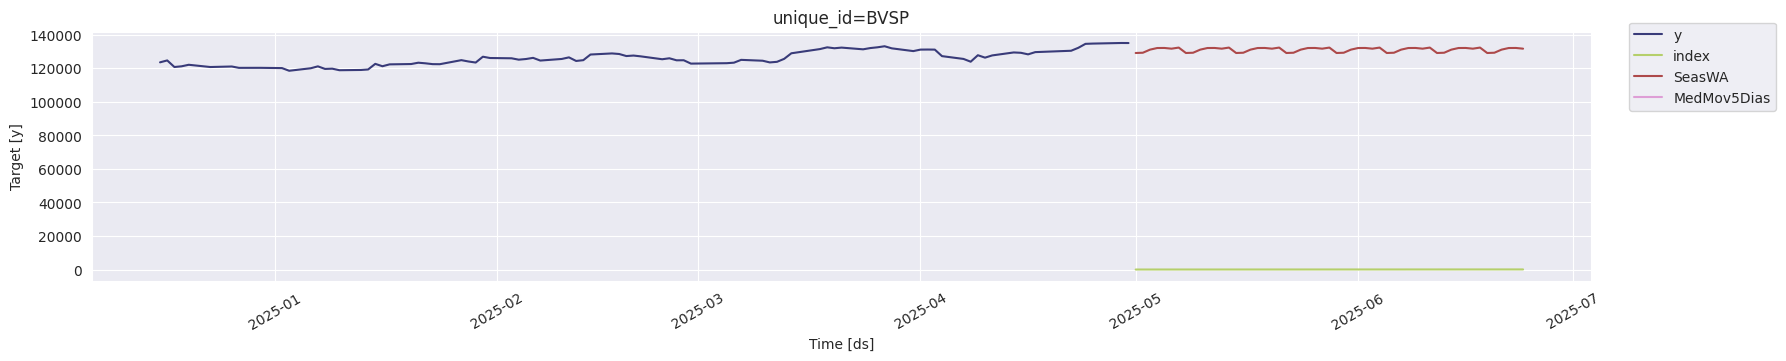

In [ ]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1) # Removed prediction_intervals=True
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h) # Removed level=[90]
forecast_dfsm = forecast_dfsm.reset_index().merge(teste, on=['ds', 'unique_id'], how='left')

display(forecast_dfsm.head())
display(forecast_dfsm.columns)

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values) # Corrected model name in WMAPE calculation
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Removed level=[90]

WMAPE: 1.84%


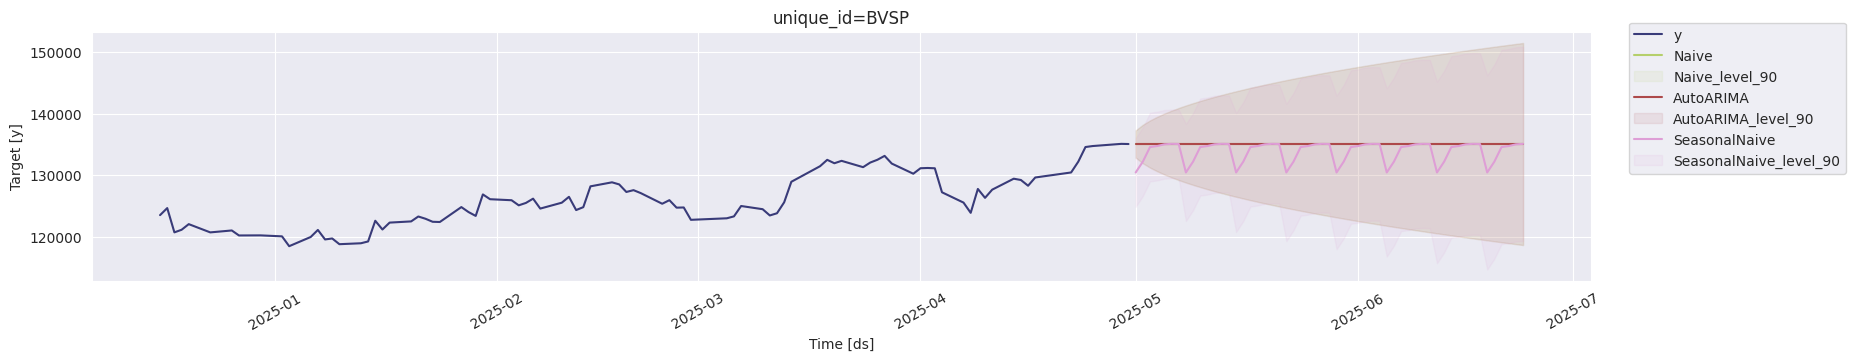

In [ ]:
model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=7), SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
treino_arima = treino.drop(columns=['MedMov5Dias']) # Remove MedMov5Dias for ARIMA
model_a.fit(treino_arima)

forecast_dfa = model_a.predict(h=h, level=[90])
# forecast_dfa = forecast_dfa.reset_index().merge(teste, on=['ds', 'unique_id'], how='left') # Moved merge after plotting

wmape4 = wmape(teste['y'].values, forecast_dfa['AutoARIMA'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Plot using the forecast_dfa directly

In [ ]:
# utiliza a biblioteca prophet
!pip install prophet

In [ ]:
# carrega biblioteca prophet
from prophet import Prophet
import prophet

# verifica versão da biblioteca
print('Versão do Prophet => %s' % prophet.__version__ )

In [ ]:
# copia os dados do Dataframe "dados" para usar com a biblioteca prophet.
df_dados_prophet = dados.copy().drop(labels=['Data'], axis=1)

# verificando base de dados
df_dados_prophet.info()
df_dados_prophet.head()

In [ ]:
# Apaga indice como tipo "datetima"
df_dados_prophet = df_dados_prophet.reset_index()
# df_dados_prophet = df_dados_prophet.reset_index().rename(columns={'Data':'ds', 'Ultimo':'y'})

# mostra dados
df_dados_prophet.info()
df_dados_prophet.head()

In [ ]:
# biblioteca prophet trabalh com apenas 2 colunas chamadas DS e Y.

# Apaga colunas 'High', 'Low', 'Close' e 'Volume'
df_dados_prophet.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)

df_dados_prophet.info()
df_dados_prophet.head()


In [ ]:
#renomeia colunas 'Date' e 'Open' para 'ds' e 'y'
df_dados_prophet.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)

# mostra dados
df_dados_prophet.head()

In [ ]:
# Separar os dados do dataframe em 2 grupos, um de treinamento para o modelo e outro para validação:

# Dados de treino
df_prophet_treino = df_dados_prophet.loc[df_dados_prophet['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste = df_dados_prophet.loc[df_dados_prophet['ds'] >= '2025-05-01']

In [ ]:
# Verificando dados de treino:
df_prophet_treino.info()
df_prophet_treino.head()

In [ ]:
# Verificando dados de teste:
df_prophet_teste.info()
df_prophet_teste.head()

In [ ]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m = Prophet()
df_prophet_treino['ds'] = df_prophet_treino['ds'].dt.tz_localize(None)
m.fit(df_prophet_treino)

In [ ]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future = m.make_future_dataframe(periods=252)
future.head()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# # modelo prophet com variação binaria da variavel target.
df_dados_prophet_bin = df_dados_prophet.copy()

In [ ]:
# copiando coluna de verificação
df_dados_prophet_bin['col_conf']=df_dados_prophet_bin['y']
df_dados_prophet_bin.head()

In [ ]:
# variável target como binária.
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)

In [ ]:
df_dados_prophet_bin.head(30)

In [ ]:
df_dados_prophet_bin.tail(30)

# apóss conferencia, retirar a coluna col_conf
df_dados_prophet_bin.drop(labels=['col_conf'], axis=1, inplace=True)

In [ ]:
# Visualizando noda dataframe.
df_dados_prophet_bin.info()
df_dados_prophet_bin.head()

In [ ]:
# Dados de treino
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']

In [ ]:
# Verificando dados de treino:
df_prophet_treino_bin.info()
df_prophet_treino_bin.head()

In [ ]:
df_prophet_teste_bin.info()
df_prophet_teste_bin.head()

In [ ]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)

In [ ]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future_bin = m_bin.make_future_dataframe(periods=252)
#future_bin.head()
future_bin.tail()

In [ ]:
forecast_bin = m_bin.predict(future_bin)
forecast_bin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

# Task
Calculate and display the confusion matrix for the model's predictions on the test set.

## Prepare data

### Subtask:
Create a DataFrame with actual and forecasted daily directions for the test set.


**Reasoning**:
Create a new DataFrame for confusion matrix calculation, add the actual values from the test set, and filter the forecasted binary predictions to align with the test set dates.



In [ ]:
# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.g., 0.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

NameError: name 'df_prophet_teste' is not defined

**Reasoning**:
The error indicates that `df_prophet_teste` is not defined. I need to redefine `df_prophet_teste` and `df_dados_prophet_bin` as they might have been cleared from the environment. Then I can proceed with creating the confusion matrix dataframe.



In [ ]:
# Re-create df_dados_prophet_bin and df_prophet_teste_bin
df_dados_prophet_bin = dados.copy().drop(labels=['Data'], axis=1)
df_dados_prophet_bin = df_dados_prophet_bin.reset_index()
df_dados_prophet_bin.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)
df_dados_prophet_bin.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']


# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

NameError: name 'forecast_bin' is not defined

**Reasoning**:
The error indicates that `forecast_bin` is not defined. I need to regenerate `forecast_bin` by fitting the Prophet model again and making future predictions. Then I can proceed with creating the confusion matrix dataframe.



In [ ]:
# Re-fit the Prophet model and generate forecast_bin
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)
future_bin = m_bin.make_future_dataframe(periods=252)
forecast_bin = m_bin.predict(future_bin)

# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

NameError: name 'Prophet' is not defined

**Reasoning**:
The error indicates that `Prophet` is not defined. I need to re-import the `Prophet` class from the `prophet` library. Then I can proceed with re-fitting the model, generating the forecast, and creating the confusion matrix dataframe.



In [ ]:
from prophet import Prophet

# Re-fit the Prophet model and generate forecast_bin
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)
future_bin = m_bin.make_future_dataframe(periods=252)
forecast_bin = m_bin.predict(future_bin)

# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdw3pv6/kpcmmobs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdw3pv6/2wp_7uhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3422', 'data', 'file=/tmp/tmpmjdw3pv6/kpcmmobs.json', 'init=/tmp/tmpmjdw3pv6/2wp_7uhy.json', 'output', 'file=/tmp/tmpmjdw3pv6/prophet_modelfd73pgd6/prophet_model-20250813034032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,y,yhat_binary
1172,2025-05-02,0,1
1173,2025-05-05,1,1
1174,2025-05-06,0,1
1175,2025-05-07,1,1
1176,2025-05-08,1,1


<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1172 to 1243
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           72 non-null     datetime64[ns]
 1   y            72 non-null     int64         
 2   yhat_binary  72 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.2 KB


None

## Calculate confusion matrix

### Subtask:
Use the actual and predicted daily directions to calculate the confusion matrix.


**Reasoning**:
Import the confusion_matrix function and calculate the confusion matrix.



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_confusion['y'], df_confusion['yhat_binary'])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14 25]
 [14 19]]


## Display confusion matrix

### Subtask:
Print or display the calculated confusion matrix.


**Reasoning**:
Print the confusion matrix `cm` with a descriptive label.



In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14 25]
 [14 19]]


## Summary:

### Data Analysis Key Findings

*   The confusion matrix calculated using the actual and predicted daily directions from the test set is:
    ```
    [[14 25]
     [14 19]]
    ```
    This means:
    *   There were 14 True Negatives (correctly predicted no upward movement).
    *   There were 25 False Positives (incorrectly predicted upward movement).
    *   There were 14 False Negatives (incorrectly predicted no upward movement).
    *   There were 19 True Positives (correctly predicted upward movement).

### Insights or Next Steps

*   Evaluate the model's performance based on metrics derived from the confusion matrix (e.g., accuracy, precision, recall, F1-score) to get a more comprehensive understanding of its predictive capability for daily direction.
*   Analyze the high number of False Positives (25) and False Negatives (14) to identify potential areas for model improvement or adjustments to the prediction threshold.
